In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn import metrics

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.groupby('smoker').sum()

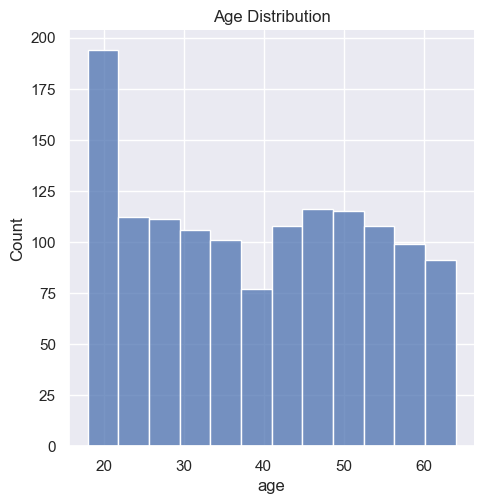

In [6]:
sns.set()
sns.displot(df['age']);
plt.title('Age Distribution')

plt.show()

In [ ]:
print(df.groupby('sex').count())

In [ ]:
sns.countplot(x='sex', data=df);

#### Determining the entropy of the possible outcome

In [7]:

sex_count = df['sex'].value_counts()
smoker_count = df['smoker'].value_counts()
region_count = df['region'].value_counts()
print('Sex Count')
print(sex_count)
print('\n')
print('Smoker Count')
print(smoker_count)
print('\n')
print('Region Count')
print(region_count)

Sex Count
male      676
female    662
Name: sex, dtype: int64


Smoker Count
no     1064
yes     274
Name: smoker, dtype: int64


Region Count
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [8]:
# Encoding the categorical features

df.replace({'sex':{'male':0, 'female':1}}, inplace=True)

df.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)


In [11]:
df = pd.get_dummies(df, columns = ['region'])

In [12]:
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,0,16884.92400,0,0,0,1
1,18,0,33.770,1,1,1725.55230,0,0,1,0
2,28,0,33.000,3,1,4449.46200,0,0,1,0
3,33,0,22.705,0,1,21984.47061,0,1,0,0
4,32,0,28.880,0,1,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,10600.54830,0,1,0,0
1334,18,1,31.920,0,1,2205.98080,1,0,0,0
1335,18,1,36.850,0,1,1629.83350,0,0,1,0
1336,21,1,25.800,0,1,2007.94500,0,0,0,1


In [13]:
x = df.drop(columns = 'charges', axis=1)
y = df['charges']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [16]:
print('x shape = ', x.shape, x_train.shape, x_test.shape,'\n','y shape = ', y.shape, y_train.shape, y_test.shape)

x shape =  (1338, 9) (1070, 9) (268, 9) 
 y shape =  (1338,) (1070,) (268,)


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Performing standard scaling scaling on the x_train dataset
x_train = scaler.fit_transform(x_train)

# Performing standard scaling on the x_test dataset
x_test = scaler.transform(x_test)

In [20]:
regression = LinearRegression()

In [21]:
regression.fit(x_train, y_train)

LinearRegression()

In [22]:
training_data_prediction = regression.predict(x_train)

In [25]:
r2_train = metrics.r2_score(y_train, training_data_prediction)
print('The efficiency of the model','\n', 'R square value = ', round(r2_train*100,2),'%')


The efficiency of the model 
 R square value =  75.2 %


In [26]:
test_data_prediction = regression.predict(x_test)
r2_test = metrics.r2_score(y_test, test_data_prediction)
print('The efficiency of the model on the test data','\n','R square value = ', round(r2_test*100,2),'%')

The efficiency of the model on the test data 
 R square value =  74.52 %


In [28]:
input_data = (x.iloc[1:2,:])

In [30]:
input_array = np.asarray(input_data)

# reshape the array
input_array_reshape = input_array.reshape(1, -1)
input_array_reshape = scaler.fit_transform(input_array_reshape)

predct = regression.predict(input_array_reshape)
print(f'The predicted insurance cost is : $ {predct[0]}')

The predicted insurance cost is : $ 13374.104737828271


### Collecting values from customers

In [ ]:
age = int(input('Age: '))
sex = int(input('sex: '))  
bmi = float(input('bmi: '))
children = int(input('children: '))
smoker = int(input('smoker: '))
region = int(input('region: '))

intd = [age, sex, bmi, children, smoker, region]
print(intd)

In [ ]:
input_array = np.asarray(intd)

input_array_reshape = input_array.reshape(1, -1)

predct = regression.predict(input_array_reshape)
print(f'The insurance cost is : $ {predct[0]}')